In [27]:
import pandas as pd 
import numpy as np 

import numpy_financial as npf

In [2]:
import numpy_financial as npf

# Input values
loan_amount = 150000  # Present value
annual_rate = 0.05  # Annual interest rate (5%)
loan_term_years = 30  # Loan term in years

# Convert annual rate and term to weekly
weekly_rate = annual_rate / 52
nper_weeks = loan_term_years * 52

# Calculate weekly payment
weekly_payment = npf.pmt(weekly_rate, nper_weeks, loan_amount)
print(f"Weekly Payment: ${-weekly_payment:.2f}")


Weekly Payment: $185.69


In [32]:
import numpy_financial as npf

# Input values
loan_amount = 150000  # Present value
annual_rate = 0.05  # Annual interest rate (5%)
loan_term_years = 30  # Loan term in years

# Convert annual rate and term to weekly
monthly_rate = annual_rate / 12
nper_months = loan_term_years * 12

# Calculate weekly payment
monthly_payment = npf.pmt(monthly_rate, nper_months, loan_amount)
print(f"Monthly Payment: ${-monthly_payment:.2f}")

Monthly Payment: $805.23


In [17]:
import numpy as np
import numpy_financial as npf



period_interest_rate = 0.05 / 12
initial_payment = 500
remaining_balance = 150000


result = npf.nper(rate=period_interest_rate, 
                                                        pmt=-initial_payment, 
                                                        pv=remaining_balance)

result

array(nan)

In [10]:
import numpy as np
import numpy_financial as npf

def calculate_nper(period_interest_rate, remaining_balance, payment_frequency):
    # Initial parameters
    initial_payment = 10
    increment_list = [1000, 100, 10, 1]  # Increment levels
    
    # Define periods per year for different frequencies
    period_per_year = {'monthly': 12, 'weekly': 52, 'fortnightly': 26}
    period_interest_rate = period_interest_rate / period_per_year[payment_frequency]
    
    # Iterate through increment levels
    for increment in increment_list:
        while True:
            # Calculate the result
            result = npf.nper(rate=period_interest_rate, pmt=-initial_payment, pv=remaining_balance)
            
            if not np.isnan(result):  # If result is valid, break to try smaller increment
                break
            else:
                initial_payment += increment  # Increase by current increment
        
        # Backtrack one step and use the next smaller increment
        initial_payment -= increment

    # Final recalculation with the refined initial payment
    result = npf.nper(rate=period_interest_rate, pmt=-initial_payment, pv=remaining_balance)
    
    return initial_payment


In [13]:
calculate_nper(0.05, 150000, 'monthly')

625

In [7]:
npf.pmt(0.075/12, 12*15, -200000)

1854.0247200054619

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


clarity_sales = {'2022': 1691822, '2023': 1818971}
GAIA_sales = {'2022': 1246742, '2023': 1332220}

clarity_COGS = {'2022': 892007, '2023': 1053087}
GAIA_COGS = {'2022': 374029, '2023': 399666}

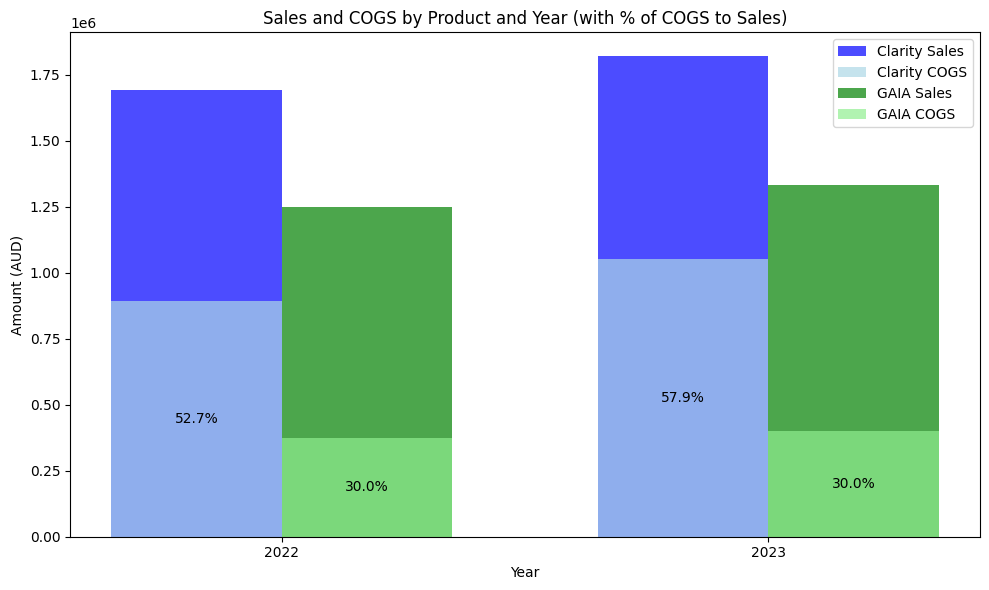

In [5]:
# Calculate percentages
clarity_percentages = [(cogs / sales) * 100 for cogs, sales in zip(clarity_COGS, clarity_sales)]
GAIA_percentages = [(cogs / sales) * 100 for cogs, sales in zip(GAIA_COGS, GAIA_sales)]

# Plotting with percentage annotations
fig, ax = plt.subplots(figsize=(10, 6))

# Clarity bars
ax.bar(x - bar_width / 2, clarity_sales, bar_width, label='Clarity Sales', color='blue', alpha=0.7)
ax.bar(x - bar_width / 2, clarity_COGS, bar_width, label='Clarity COGS', color='lightblue', alpha=0.7)
for i, (sales, cogs, perc) in enumerate(zip(clarity_sales, clarity_COGS, clarity_percentages)):
    ax.text(x[i] - bar_width / 2, cogs / 2, f"{perc:.1f}%", ha='center', va='center', fontsize=10, color='black')

# GAIA bars
ax.bar(x + bar_width / 2, GAIA_sales, bar_width, label='GAIA Sales', color='green', alpha=0.7)
ax.bar(x + bar_width / 2, GAIA_COGS, bar_width, label='GAIA COGS', color='lightgreen', alpha=0.7)
for i, (sales, cogs, perc) in enumerate(zip(GAIA_sales, GAIA_COGS, GAIA_percentages)):
    ax.text(x[i] + bar_width / 2, cogs / 2, f"{perc:.1f}%", ha='center', va='center', fontsize=10, color='black')

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Amount (AUD)')
ax.set_title('Sales and COGS by Product and Year (with % of COGS to Sales)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


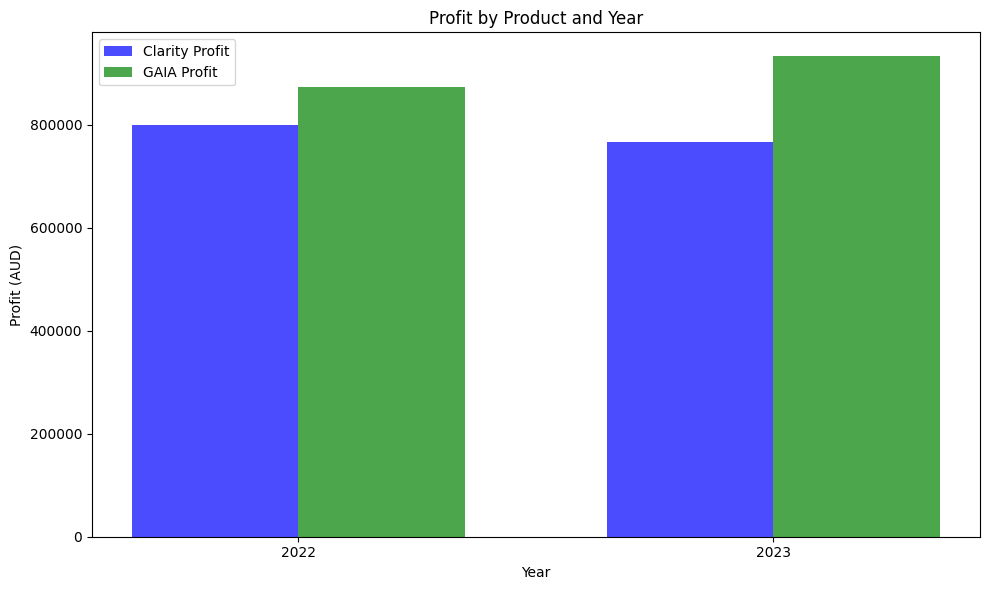

In [8]:
# Calculate profit
clarity_profit = [sales - cogs for sales, cogs in zip(clarity_sales, clarity_COGS)]
GAIA_profit = [sales - cogs for sales, cogs in zip(GAIA_sales, GAIA_COGS)]

# Plotting the profits in a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and positions
bar_width = 0.35
x = np.arange(len(years))

# Profit bars
ax.bar(x - bar_width / 2, clarity_profit, bar_width, label='Clarity Profit', color='blue', alpha=0.7)
ax.bar(x + bar_width / 2, GAIA_profit, bar_width, label='GAIA Profit', color='green', alpha=0.7)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Profit (AUD)')
ax.set_title('Profit by Product and Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
